# TASK A: Building a Binary Classifier by Implementing CNN

## Importing the necessary libraries for the task

In [1]:
import numpy as np
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, accuracy_score, confusion_matrix, ConfusionMatrixDisplay
import time

import matplotlib.pyplot as plt
import data_acquisition as da
#import tensorflow as tf
#from tensorflow import keras
import keras
from keras.layers import *
from keras.models import *

Using TensorFlow backend.


## Getting the Training and Validation Data

In [2]:
# Importing the data through the data_acquisition file
xdat, ydat = da.labels_binary('./dataset')
x = np.array(xdat)
y = np.array(ydat)

# Normalizing the features
x /= 255

# Converting the 3 dimensional features to one dimension
for i in range(x.shape[0]):
    x[i] = np.reshape(x[i], (512, 512, 1))

In [3]:
# Splitting the dataset into training and validation set (85% training and 15% validation set)
xtrain, xval, ytrain, yval = train_test_split(x, y, train_size=0.85, random_state=15) 

In [4]:
xtrain.shape

(2550, 512, 512, 1)

## Implementing CNN Algorithm from the Keras Library

In [5]:
# Creating the CNN Model
cnn_model = Sequential()
cnn_model.add(Conv2D(32, kernel_size=(3,3), activation='relu', input_shape=(512,512,1)))
cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(64, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Conv2D(128, (3,3), activation='relu'))
cnn_model.add(MaxPooling2D(pool_size=(2,2)))
cnn_model.add(Dropout(0.25))

cnn_model.add(Flatten())
cnn_model.add(Dense(64, activation='relu'))
cnn_model.add(Dropout(0.25))
cnn_model.add(Dense(1, activation='sigmoid'))

# Compiling the model by specifying the loss function as binary cross entropy  and the optimizer is set as Adam, and metrics  is accuracy
cnn_model.compile(loss=keras.losses.binary_crossentropy, optimizer='adam', metrics=['accuracy'])

In [6]:
# Getting the summary of the created CNN model
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 510, 510, 32)      320       
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 508, 508, 64)      18496     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 254, 254, 64)      0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 254, 254, 64)      0         
_________________________________________________________________
conv2d_3 (Conv2D)            (None, 252, 252, 64)      36928     
_________________________________________________________________
max_pooling2d_2 (MaxPooling2 (None, 126, 126, 64)      0         
_________________________________________________________________
dropout_2 (Dropout)          (None, 126, 126, 64)     

In [7]:
# Predicting the outputs using CNN while also finding the runtime
start_time = time.time()
final_model = cnn_model.fit(xtrain, ytrain, batch_size=10, epochs=10, validation_data=(xval, yval))
classifier1_time = time.time() - start_time
print("Training time is: %s seconds" % (classifier1_time))

Train on 2550 samples, validate on 450 samples
Epoch 1/10
2550/2550 [==============================] - 59s 23ms/step - loss: 0.4730 - accuracy: 0.8463 - val_loss: 0.3251 - val_accuracy: 0.85560.6521 - accuracy:  - ETA: 41s - loss: 0.6315 - ac - ETA: 36s - loss: 0.6114 - accuracy:  - ETA: 34s - loss: 0 - ETA: 26s - loss: 0.5805 - accuracy: 0.8 - ETA: 25s - loss: 0.5779 - accu - ETA: 22s - loss: 0.5625 - accuracy: 0.837 - ETA: 22s - loss: 0.5610 - accuracy: 0 - ETA: 20s - loss: 0.5546 - accuracy: 0.8 - ETA: 20s - loss: 0.5501 - accura - ETA: 17s - loss: 0.5391 - accuracy: 0.837 - ETA: 17s - loss: 0.5400 - accuracy: 0.835 - ETA: 17s - loss: 0.5385 - accuracy: 0. - ETA: 16s - loss: 0.5331 - accuracy: 0.83 - ETA: 15s - loss: 0. - ETA: 10s - loss: 0.5072 - accur - ETA: 8s - loss: 0.5010 -  - ETA: 6s - loss: 0.4906 - accura - ETA: 5s - loss: 0.4847 - accu - ETA: 4s - loss: 0.482 - ETA: 1s - loss: 0.4795 - accuracy: 0. - ETA: 1s - loss: 0.4769 - ac
Epoch 2/10
2550/2550 [=======================

In [8]:
# Predicting the outputs for the training and validation set using our fitted model
y_pred_train1 = cnn_model.predict_classes(xtrain)
y_pred_val1 = cnn_model.predict_classes(xval)

## Evaluating the Model Using the Validation Set

The accuracy of the train set: 
0.9905882352941177
The accuracy of the validation set: 
0.9622222222222222
The classification report: 
              precision    recall  f1-score   support

    no tumor       0.93      0.80      0.86        65
       tumor       0.97      0.99      0.98       385

    accuracy                           0.96       450
   macro avg       0.95      0.89      0.92       450
weighted avg       0.96      0.96      0.96       450

The confusion matrix: 


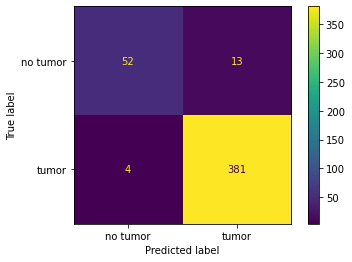

In [9]:
# Producing an accuracy score
print('The accuracy of the train set: ')
print(accuracy_score(ytrain, y_pred_train1))
print('The accuracy of the validation set: ')
print(accuracy_score(yval, y_pred_val1))

# Creating a classification report
print('The classification report: ')
print(classification_report(yval, y_pred_val1, target_names=['no tumor', 'tumor']))

# Creating a confusion matrix
print('The confusion matrix: ')
conf_mat1 = confusion_matrix(yval, y_pred_val1, labels=[0, 1])
cm_disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1, display_labels=['no tumor', 'tumor'])
cm_disp1.plot()

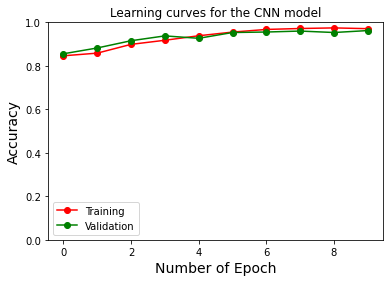

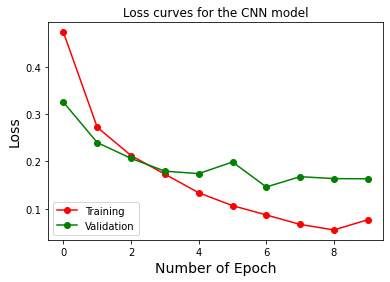

In [10]:
# In order to graph the learning curve and the loss curve of the models .history atribute of the fitted model is utilized.
# Afterwards the learning curve and the loss curve are plotted.
plt.plot(final_model.history['accuracy'], 'o-', color="r", label = 'Training error')
plt.plot(final_model.history['val_accuracy'], 'o-', color="g", label = 'Validation error')
plt.ylabel('Accuracy', fontsize = 14)
plt.xlabel('Number of Epoch', fontsize = 14)
plt.ylim((0,1))
plt.title('Learning curves for the CNN model')
plt.legend(['Training', 'Validation'], loc='lower left')
plt.show()

plt.plot(final_model.history['loss'], 'o-', color="r", label = 'Training')
plt.plot(final_model.history['val_loss'], 'o-', color="g", label = 'Validation')
plt.ylabel('Loss', fontsize = 14)
plt.xlabel('Number of Epoch', fontsize = 14)
plt.legend(['Training', 'Validation'], loc='lower left')
plt.title('Loss curves for the CNN model')
plt.show()

# Testing the Model with the Test Data

# Getting the Testing Data

In [11]:
# Importing the data through the data_acquisition file
x2dat, y2dat = da.labels_binary('./test')
x2 = np.array(x2dat)
y2 = np.array(y2dat)

# Normalizing the features
x2 /= 255

# Converting the 3 dimensional features to one dimension
for i in range(x2.shape[0]):
    x2[i] = np.reshape(x2[i], (512, 512, 1))

In [12]:
# Predicting the output using our model
y2_test_pred = cnn_model.predict_classes(x2)

# Evaluating the Model Using the Test Set

The accuracy of the test set: 
0.965
The classification report: 
              precision    recall  f1-score   support

    no tumor       0.89      0.92      0.91        37
       tumor       0.98      0.98      0.98       163

    accuracy                           0.96       200
   macro avg       0.94      0.95      0.94       200
weighted avg       0.97      0.96      0.97       200

The confusion matrix: 


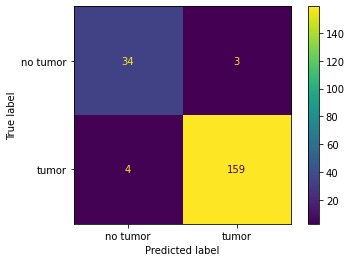

In [13]:
# Producing an accuracy score
print('The accuracy of the test set: ')
print(accuracy_score(y2, y2_test_pred))

# Creating a classification report
print('The classification report: ')
print(classification_report(y2, y2_test_pred, target_names=['no tumor', 'tumor']))

# Creating a confusion matrix
print('The confusion matrix: ')
conf_mat1 = confusion_matrix(y2, y2_test_pred, labels=[0, 1])
cm_disp1 = ConfusionMatrixDisplay(confusion_matrix=conf_mat1, display_labels=['no tumor', 'tumor'])
cm_disp1.plot()